In [2]:
# Cell 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
# Cell 2: Load and preprocess the data

# Load data
df_sentiments = pd.read_csv('binary_sentiment_predictions_2022.csv')
df_emotions = pd.read_csv('binary_predictions_2022.csv')
df_border = pd.read_csv('hcr_dat_border.csv')

# Convert to datetime
df_sentiments['date'] = pd.to_datetime(df_sentiments['date'])
df_emotions['date'] = pd.to_datetime(df_emotions['date'])
df_border['data_date'] = pd.to_datetime(df_border['data_date'])
df_border.columns = df_border.columns.str.strip()

df_sentiments = df_sentiments[df_sentiments['predicted_sentiment'] != 'neutral']
print(df_sentiments.head())



   Unnamed: 0       date      city  \
0           0 2022-11-17  Миколаїв   
2           2 2022-11-17    Херсон   
3           3 2022-11-17    Херсон   
4           4 2022-11-17    Херсон   
5           5 2022-11-17    Херсон   

                                               tweet predicted_sentiment  
0  Глава дипломатії Європейського Союзу Жозеп Бор...            negative  
2  Президент України Володимир Зеленський відпові...            negative  
3  У визволений від російських загарбників Херсон...            negative  
4  В Україні з'явиться реєстр збитків від агресії...            negative  
5  Російська влада не буде вести публічних перего...            negative  


In [10]:
# Cell 3: Weekly aggregations


'''
#By Sum:
weekly_sentiments = df_sentiments.groupby(pd.Grouper(key='date', freq='W')).predicted_sentiment.value_counts().unstack().fillna(0)
weekly_emotions = df_emotions.groupby(pd.Grouper(key='date', freq='W')).predicted_emotion.value_counts().unstack().fillna(0)
weekly_border = df_border.groupby(pd.Grouper(key='data_date', freq='W')).Border_Crossings.sum()
print(weekly_sentiments.head())
'''


# By Mean:
daily_sentiments = df_sentiments.groupby([df_sentiments['date'].dt.date, 'predicted_sentiment']).size().reset_index(name='count')
daily_emotions = df_emotions.groupby([df_emotions['date'].dt.date, 'predicted_emotion']).size().reset_index(name='count')

# Convert the 'date' to datetime again because the above grouping by date object changes its type
daily_sentiments['date'] = pd.to_datetime(daily_sentiments['date'])
daily_emotions['date'] = pd.to_datetime(daily_emotions['date'])

# Now group by week and sentiment/emotion to calculate the mean of the daily counts
weekly_sentiments = daily_sentiments.groupby([pd.Grouper(key='date', freq='W'), 'predicted_sentiment']).mean().unstack('predicted_sentiment')['count'].fillna(0)
weekly_emotions = daily_emotions.groupby([pd.Grouper(key='date', freq='W'), 'predicted_emotion']).mean().unstack('predicted_emotion')['count'].fillna(0)
# Remove commas, strip spaces, replace non-numeric entries with NaN, and convert to float

df_border['Border_Crossings'] = pd.to_numeric(df_border['Border_Crossings'].str.replace(',', '').str.strip(), errors='coerce')
weekly_border = df_border.groupby(pd.Grouper(key='data_date', freq='W')).Border_Crossings.mean()
'''

#By Max:
# Group by day and category to get the daily counts
daily_sentiments = df_sentiments.groupby([df_sentiments['date'].dt.date, 'predicted_sentiment']).size().reset_index(name='count')
daily_emotions = df_emotions.groupby([df_emotions['date'].dt.date, 'predicted_emotion']).size().reset_index(name='count')

# Convert the 'date' back to datetime
daily_sentiments['date'] = pd.to_datetime(daily_sentiments['date'])
daily_emotions['date'] = pd.to_datetime(daily_emotions['date'])

# Now group by week and sentiment/emotion to find the maximum of the daily counts
weekly_sentiments = daily_sentiments.groupby([pd.Grouper(key='date', freq='W'), 'predicted_sentiment']).max().unstack('predicted_sentiment')['count'].fillna(0)
weekly_emotions = daily_emotions.groupby([pd.Grouper(key='date', freq='W'), 'predicted_emotion']).max().unstack('predicted_emotion')['count'].fillna(0)

#df_border['Border_Crossings'] = pd.to_numeric(df_border['Border_Crossings'].str.replace(',', '').str.strip(), errors='coerce')
weekly_border = df_border.groupby(pd.Grouper(key='data_date', freq='W')).Border_Crossings.max()
'''


"\n\n#By Max:\n# Group by day and category to get the daily counts\ndaily_sentiments = df_sentiments.groupby([df_sentiments['date'].dt.date, 'predicted_sentiment']).size().reset_index(name='count')\ndaily_emotions = df_emotions.groupby([df_emotions['date'].dt.date, 'predicted_emotion']).size().reset_index(name='count')\n\n# Convert the 'date' back to datetime\ndaily_sentiments['date'] = pd.to_datetime(daily_sentiments['date'])\ndaily_emotions['date'] = pd.to_datetime(daily_emotions['date'])\n\n# Now group by week and sentiment/emotion to find the maximum of the daily counts\nweekly_sentiments = daily_sentiments.groupby([pd.Grouper(key='date', freq='W'), 'predicted_sentiment']).max().unstack('predicted_sentiment')['count'].fillna(0)\nweekly_emotions = daily_emotions.groupby([pd.Grouper(key='date', freq='W'), 'predicted_emotion']).max().unstack('predicted_emotion')['count'].fillna(0)\n\n#df_border['Border_Crossings'] = pd.to_numeric(df_border['Border_Crossings'].str.replace(',', '').str.

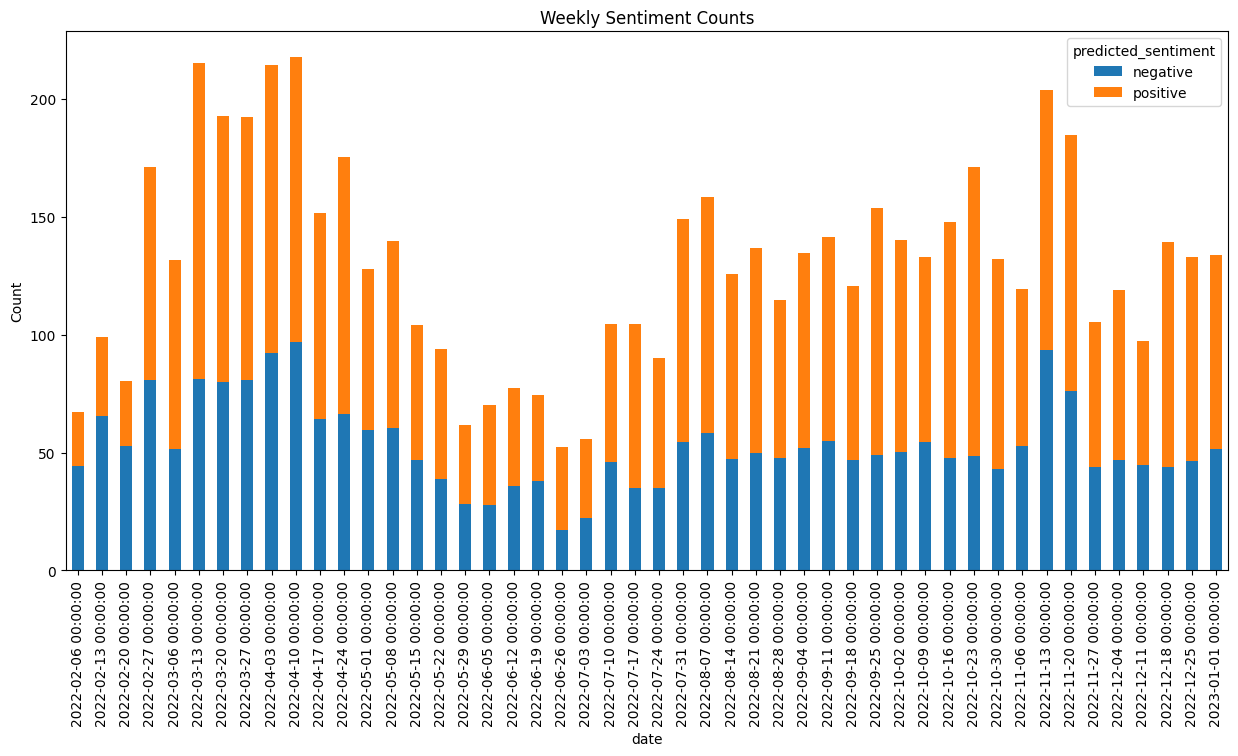

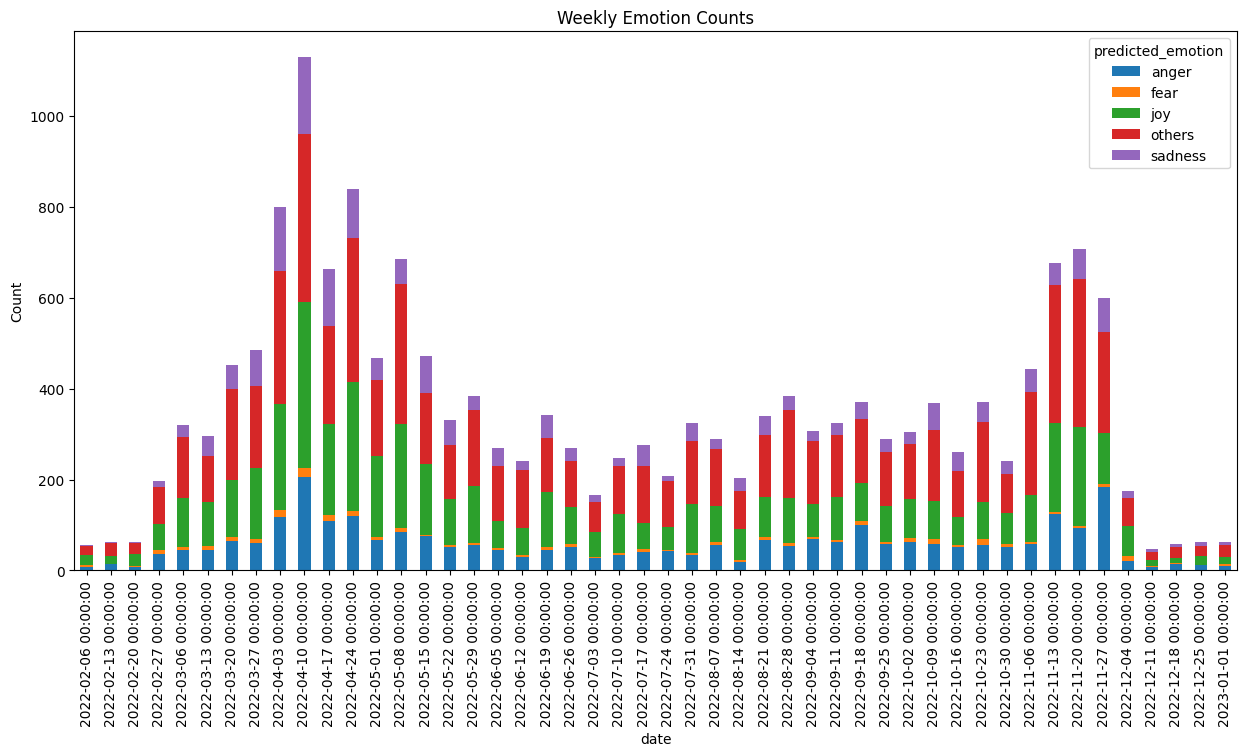

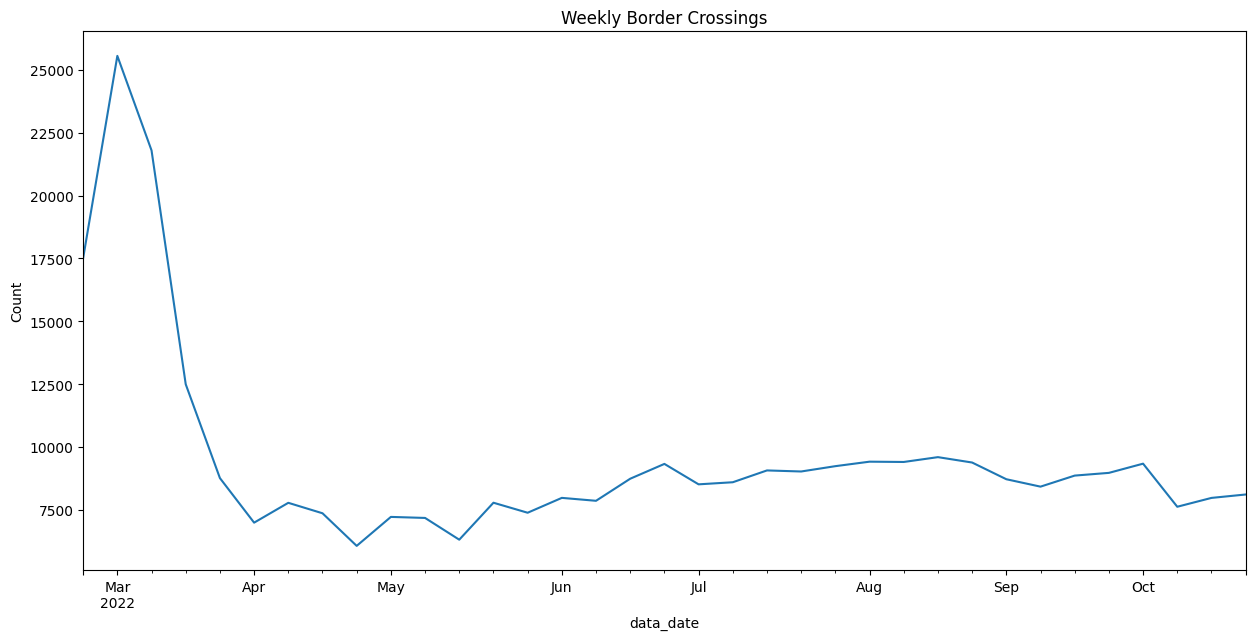

In [11]:
# Cell 4: Visualization

import matplotlib.pyplot as plt
'''
# Plot Weekly Average Sentiment Counts
weekly_sentiments.plot(x='date', kind='bar', stacked=True, figsize=(15,7))
plt.title("Weekly Average Sentiment Counts")
plt.ylabel("Average Count")
plt.xlabel("Week")
plt.legend(title='Sentiment')
plt.show()

# Plot Weekly Average Emotion Counts
weekly_emotions.plot(x='date', kind='bar', stacked=True, figsize=(15,7))
plt.title("Weekly Average Emotion Counts")
plt.ylabel("Average Count")
plt.xlabel("Week")
plt.legend(title='Emotion')
plt.show()


'''
# Weekly Sentiments
weekly_sentiments.plot(kind="bar", stacked=True, figsize=(15,7))
plt.title("Weekly Sentiment Counts")
plt.ylabel("Count")
plt.show()

# Weekly Emotions
weekly_emotions.plot(kind="bar", stacked=True, figsize=(15,7))
plt.title("Weekly Emotion Counts")
plt.ylabel("Count")
plt.show()


# Weekly Border Crossings
weekly_border.plot(kind="line", figsize=(15,7))
plt.title("Weekly Border Crossings")
plt.ylabel("Count")
plt.show()


             negative   positive      anger      fear         joy      others  \
2022-02-06  44.333333  23.000000   7.333333  5.500000   21.750000   18.500000   
2022-02-13  65.428571  33.571429  13.333333  2.000000   17.285714   27.285714   
2022-02-20  52.857143  27.428571   8.714286  1.000000   25.857143   24.571429   
2022-02-27  80.857143  90.000000  35.666667  8.333333   59.142857   80.285714   
2022-03-06  51.428571  80.142857  44.714286  6.857143  108.142857  133.714286   

              sadness  Border_Crossings  
2022-02-06   2.000000               NaN  
2022-02-13   3.285714               NaN  
2022-02-20   3.200000               NaN  
2022-02-27  13.714286      17515.464286  
2022-03-06  27.571429      25562.326531  


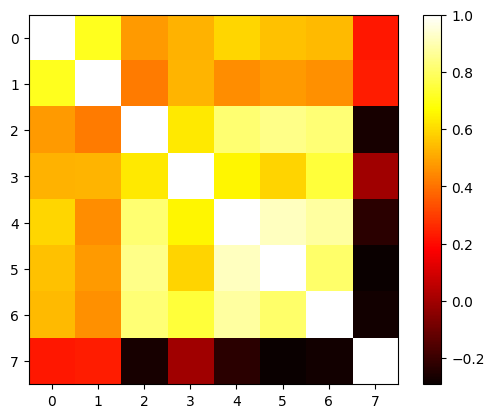

In [12]:
# Cell 5: Compute Correlations

def aggregate_crossings(val):
    if isinstance(val, str):
        # Split the string by spaces
        numbers = val.split()  
        # Remove commas, check if the string is numeric, convert to integer, and sum
        total = sum([int(num.replace(',', '')) for num in numbers if num.replace(',', '').replace('-', '').isnumeric()])  
        return total
    return val  # if NaN or already a number

# Merge dataframes for correlation calculation
df_combined = pd.concat([weekly_sentiments, weekly_emotions, weekly_border], axis=1)
df_combined['Border_Crossings'] = df_combined['Border_Crossings'].apply(aggregate_crossings)
correlations = df_combined.corr()
print(df_combined.head())


plt.imshow(correlations, cmap='hot', interpolation='nearest')
plt.colorbar()

# Heatmap of correlations
#plt.figure(figsize=(12,8))
#sns.heatmap(correlations, annot=True, cmap='coolwarm')
#plt.title("Correlations between Sentiments, Emotions, and Border Crossings")
#plt.show()

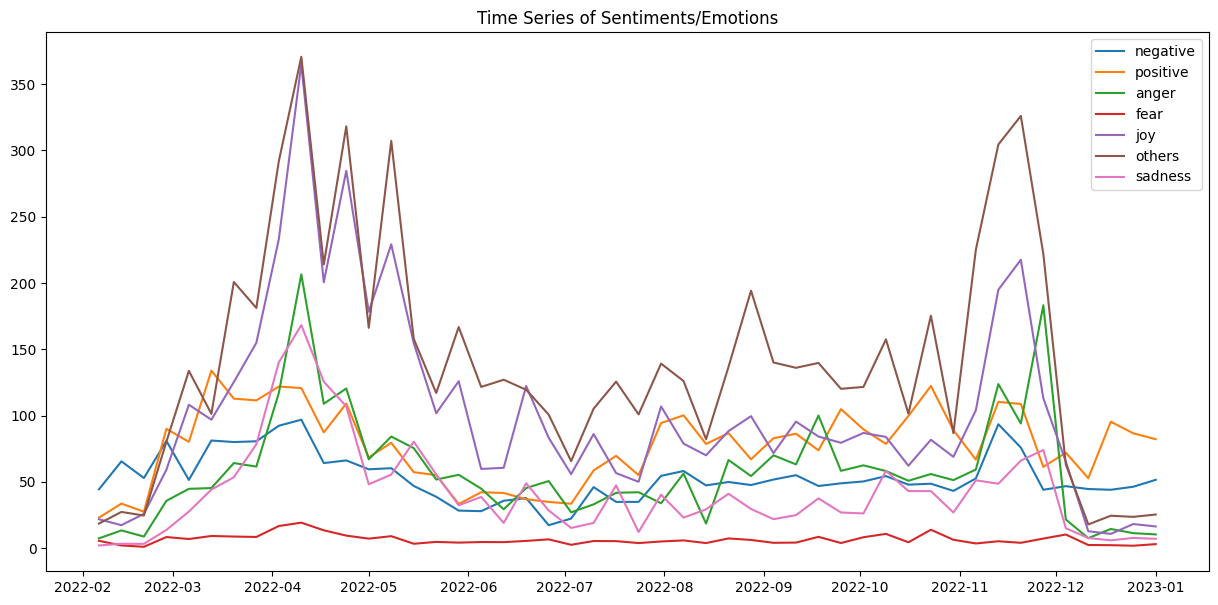

In [13]:
plt.figure(figsize=(15,7))
for column in df_combined.columns[:-1]:  # Excluding Border_Crossings for now
    plt.plot(df_combined.index, df_combined[column], label=column)
plt.legend()
plt.title("Time Series of Sentiments/Emotions")
plt.show()


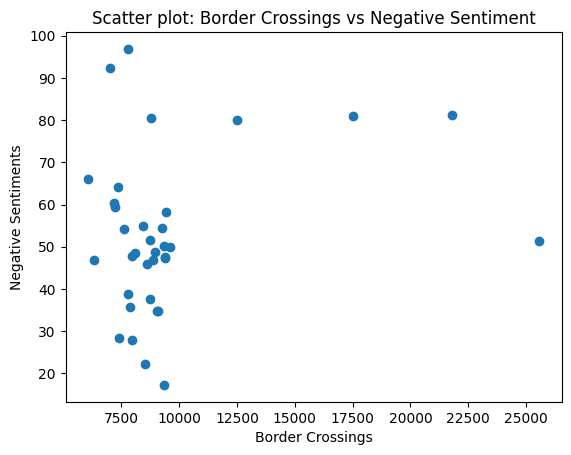

In [14]:
plt.scatter(df_combined['Border_Crossings'], df_combined['negative'])
plt.title("Scatter plot: Border Crossings vs Negative Sentiment")
plt.xlabel("Border Crossings")
plt.ylabel("Negative Sentiments")
plt.show()


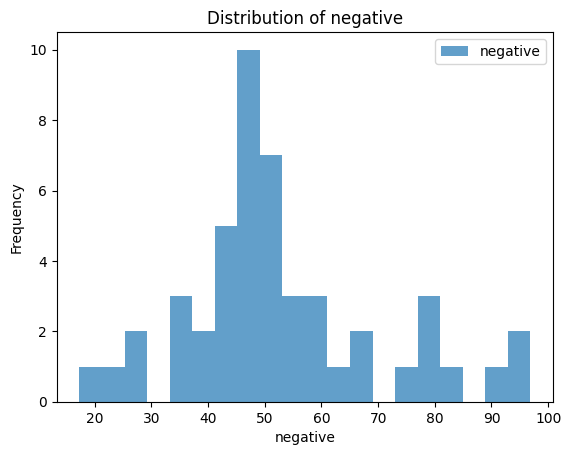

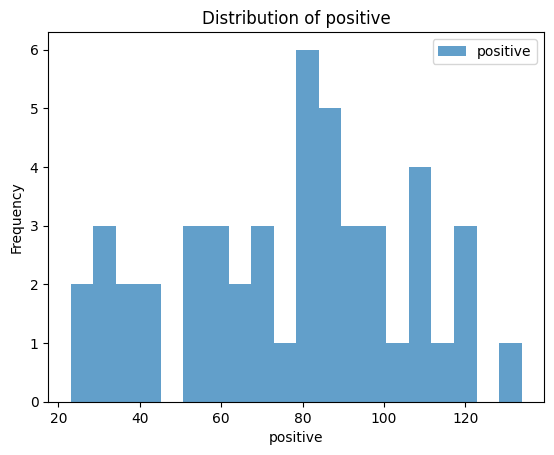

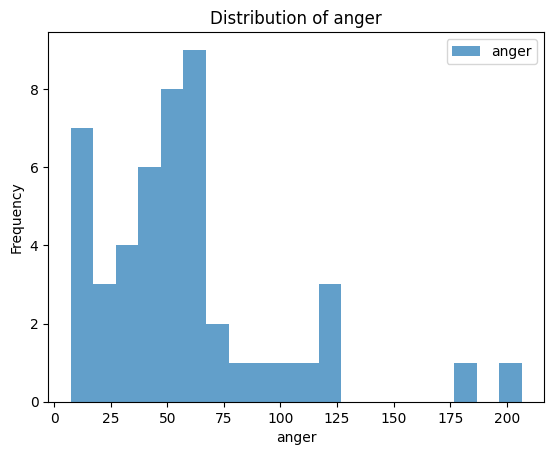

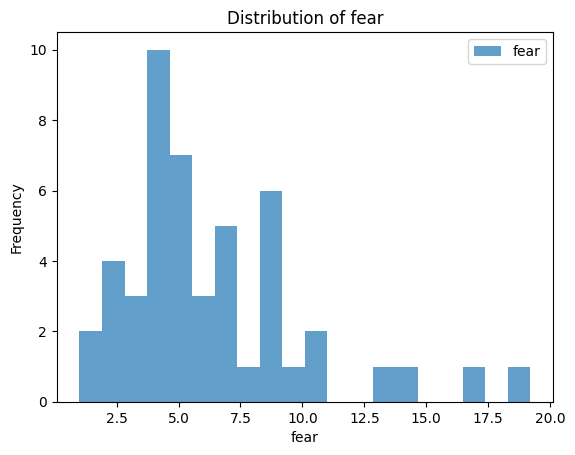

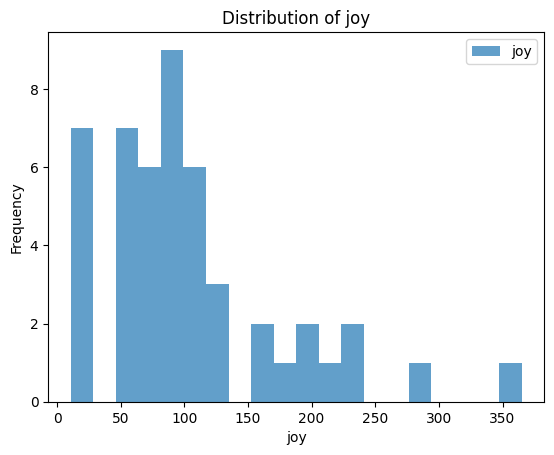

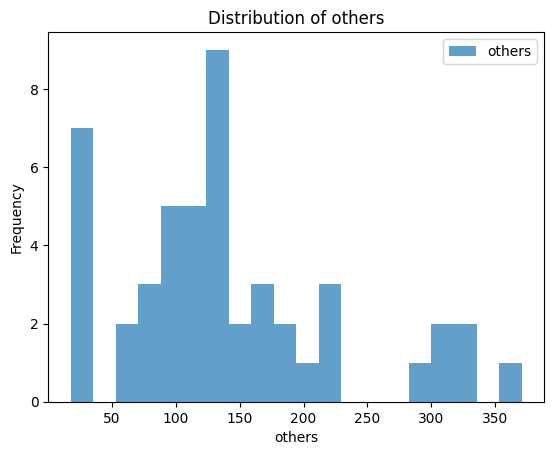

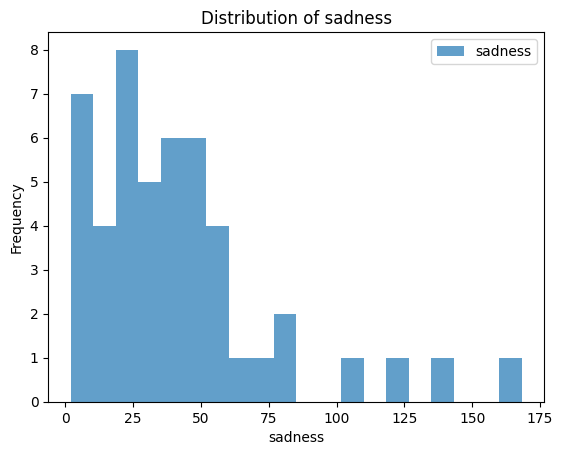

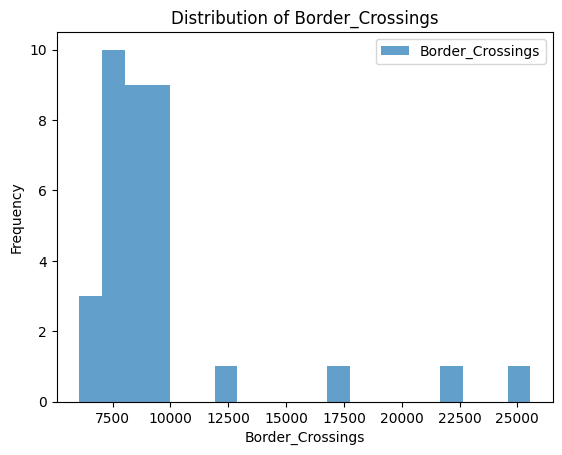

In [15]:
for column in df_combined.columns:
    plt.hist(df_combined[column], bins=20, alpha=0.7, label=column)
    
    plt.xlabel(column)  # X-axis label represents the respective column name
    plt.ylabel('Frequency')  # Y-axis always represents the frequency in histograms
    
    plt.legend()
    plt.title(f"Distribution of {column}")
    plt.show()



In [27]:
#sns.boxplot(data=df_combined)
#plt.title("Boxplot of Sentiments/Emotions and Border Crossings")
#plt.xticks(rotation=45)
#plt.show()


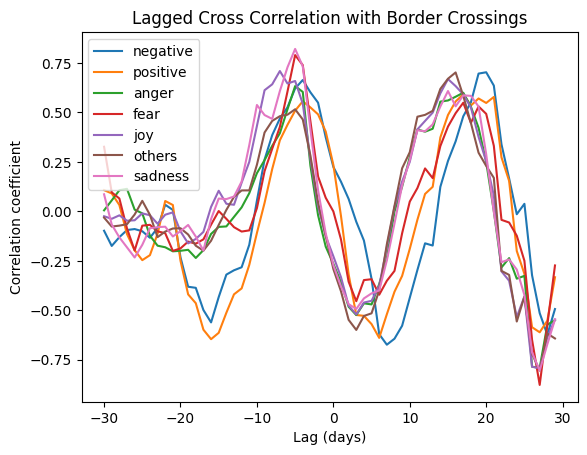

In [17]:
lags = range(-30, 30)  # for example, checking up to 30 days lag
for column in df_combined.columns[:-1]:
    correlations = [df_combined[column].corr(df_combined['Border_Crossings'].shift(-lag)) for lag in lags]
    plt.plot(lags, correlations, label=column)
plt.legend()
plt.title("Lagged Cross Correlation with Border Crossings")
plt.xlabel("Lag (days)")
plt.ylabel("Correlation coefficient")
plt.show()

